# EDA project for Stakeholder (Buyer)

### Dataset
**House Sales in King County, USA**

### About Dataset

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

*source: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction?datasetId=128&sortBy=commentCount&searchQuery=eda+map*

### Aim of this project
Help out buyer to find one house in the city center and one house at countryside

> **Stakeholder profile**

| Profile| Details|
| ---|---|
|Name|William Rodriguez|
|Status|Buyer|
|Family|2|
|Financial situation|Wealthy (ref: https://www.thebalance.com/american-middle-class-net-worth-3973493)|
|Age range|40 - 45|
|Median Net Worth|$3,000,000|
|Mean Net Worth|$7,000,000|

> **Requirement-1 (City center)**

House | Criteria
--------|-------
Location | centrally located
Rooms | 3-4
Bathrooms | min. 2
Renovation | not more than 1 year
Condition | good -> 4 [source: https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#b]<br> - No obvious maintenance required<br> - But everything is not new 
Grade | custom design and higher quality finish work (11 and above) [source: https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#b]
Build year | Build after year 2010
Availability | ASAP

> **Requirement-2 (Countryside)**

House | Criteria
--------|-------
Location | out skirts
Rooms | 4
Bathrooms | min. 3
Renovation | no
Condition | average -> 3 [source: https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#b]<br> - Maintenance required<br> - Renovation required<br> 
Grade | Better architecture design -> 9 [source: https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#b]
Build year | Build in year 2010
Availability | can wait for good option

</br>
<br>

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

import geopandas as gpd
import folium               # Visualization
import geojson


## Getting to Know the Data
`IMPORTANT` First get an overview of the data before starting visualization.

1) Columns name description: https://github.com/neuefische/ds-eda-project-template/blob/main/column_names.md
<br>

2) Check dataframe head and tail by using `head()` and `tail()`. `sample()` can also be use to check random rows
3) Check no. of rows and columns by using `shape`
4) Check data type and missing values using `info()`. `dtypes` is another option
5) Numerical columns statistics overview by `describe()`. Pass include='all' in `describe(include='all')` for categorical values as well. `agg(['max', 'min', 'std'])` is also another option
6) `unique()` is use to list unique values. `nunique()` give the count of unique values

In [10]:
# importing dataset

df = pd.read_csv('data/King_County_House_prices_dataset.csv')

In [3]:
# no. of rows and columns

df.shape

(21613, 21)

In [4]:
# checking the first 5 rows

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# random rows

df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12905,5100403882,20150427T000000,967000.0,4,2.5,3100,7250,2.0,0,0,...,9,3100,0,2010,0,98115,47.6961,-122.316,1240,6670
2565,7856400240,20150211T000000,1650000.0,4,3.0,3900,9750,1.0,0,4,...,10,2520,1380,1972,0,98006,47.5605,-122.158,3410,9450
11308,2407900550,20150507T000000,448000.0,4,2.5,2230,5000,1.0,0,0,...,7,1650,580,2006,0,98059,47.4799,-122.129,2090,4637
16258,1652500010,20150326T000000,2328000.0,4,3.5,4420,20759,2.0,0,0,...,11,4420,0,2003,0,98004,47.6354,-122.221,3020,20666
17833,7853220970,20140528T000000,515000.0,4,2.5,2680,7178,2.0,0,0,...,8,2680,0,2004,0,98065,47.5325,-121.856,2540,7133


In [6]:
# checking for data type and missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
# converting date column to datetime formate

df['date'] = df['date'].apply(pd.to_datetime)

In [8]:
# checking for missing values

df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Remark: we have missing values for feature columns `waterfront` and `yr_renovated`

In [9]:
# checking for unique values to identify continuos and categorical features

df.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

Remark: Summary shows that 
- features `date`, `waterfront`, `view`, `condition`, `grade`, `yr_built`, `yr_renovated` and `zipcode` are categorical
<br>

- features `bedrooms`, `bathrooms` and `floors` are discrete
- and rest of the features are continuous

In [10]:
print(df.waterfront.unique())
print(df.view.unique())
print(df.condition.unique())
print(df.grade.unique())
print(df.yr_built.unique())
print(df.zipcode.unique())

[nan  0.  1.]
[ 0. nan  3.  4.  2.  1.]
[3 5 4 1 2]
[ 7  6  8 11  9  5 10 12  4  3 13]
[1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 1942 1927 1977 1900
 1979 1994 1916 1921 1969 1947 1968 1985 1941 1915 1909 1948 2005 1929
 1981 1930 1904 1996 2000 1984 2014 1922 1959 1966 1953 1950 2008 1991
 1954 1973 1925 1989 1972 1986 1956 2002 1992 1964 1952 1961 2006 1988
 1962 1939 1946 1967 1975 1980 1910 1983 1978 1905 1971 2010 1945 1924
 1990 1914 1926 2004 1923 2007 1976 1949 1999 1901 1993 1920 1997 1943
 1957 1940 1918 1928 1974 1911 1936 1937 1982 1908 1931 1998 1913 2013
 1907 1958 2012 1912 2011 1917 1932 1944 1902 2009 1903 1970 2015 1934
 1938 1919 1906 1935]
[98178 98125 98028 98136 98074 98053 98003 98198 98146 98038 98007 98115
 98107 98126 98019 98103 98002 98133 98040 98092 98030 98119 98112 98052
 98027 98117 98058 98001 98056 98166 98023 98070 98148 98105 98042 98008
 98059 98122 98144 98004 98005 98034 98075 98116 98010 98118 98199 98032
 98045 98102 98077 98108 98168 

In [11]:
print(df.bedrooms.unique())
print(df.bathrooms.unique())
print(df.floors.unique())

[ 3  2  4  5  1  6  7  8  9 11 10 33]
[1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75 6.25
 6.5 ]
[1.  2.  1.5 3.  2.5 3.5]


In [12]:
# statistical summary
# Method-1

#df.describe()
df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

# Method-2

#df.agg(['count', 'mean', 'median', 'std', 'max', 'min']).transpose()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,19221.0,21534.0,21597.0,21597.0,21597.0,21597.0,17755.0,21597.0,21597.0,21597.0,21597.0,21597.0
mean,4580474287.8,540296.6,3.4,2.1,2080.3,15099.4,1.5,0.0,0.2,3.4,7.7,1788.6,1971.0,83.6,98078.0,47.6,-122.2,1986.6,12758.3
std,2876735715.7,367368.1,0.9,0.8,918.1,41412.6,0.5,0.1,0.8,0.7,1.2,827.8,29.4,399.9,53.5,0.1,0.1,685.2,27274.4
min,1000102.0,78000.0,1.0,0.5,370.0,520.0,1.0,0.0,0.0,1.0,3.0,370.0,1900.0,0.0,98001.0,47.2,-122.5,399.0,651.0
25%,2123049175.0,322000.0,3.0,1.8,1430.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,1951.0,0.0,98033.0,47.5,-122.3,1490.0,5100.0
50%,3904930410.0,450000.0,3.0,2.2,1910.0,7618.0,1.5,0.0,0.0,3.0,7.0,1560.0,1975.0,0.0,98065.0,47.6,-122.2,1840.0,7620.0
75%,7308900490.0,645000.0,4.0,2.5,2550.0,10685.0,2.0,0.0,0.0,4.0,8.0,2210.0,1997.0,0.0,98118.0,47.7,-122.1,2360.0,10083.0
max,9900000190.0,7700000.0,33.0,8.0,13540.0,1651359.0,3.5,1.0,4.0,5.0,13.0,9410.0,2015.0,2015.0,98199.0,47.8,-121.3,6210.0,871200.0


Remarks:
- Average house price is around $540K
<br>

- The oldest house is built in 1900 and the news one in 2015

## Feature Engineering

In [8]:
print(df.waterfront.unique())
print(df.view.unique())

[0 1]
[0 3 4 2 1]


In [14]:
# %age of missing values in the dataset

print('%age of missing values for waterfront feature:', round(df.waterfront.isnull().sum() * 100 / len(df), 2))
print('%age of missing values for view feature:', round(df.view.isnull().sum() * 100 / len(df), 2))
print('%age of missing values for yr_renovated feature:', round(df.yr_renovated.isnull().sum() * 100 / len(df), 2))


%age of missing values for waterfront feature: 11.0
%age of missing values for view feature: 0.29
%age of missing values for yr_renovated feature: 17.79


Remarks: We will replace missing values with 0 as missing value %age is not high

In [15]:
df.waterfront.fillna(0, inplace=True)
df.view.fillna(0, inplace=True)
df.yr_renovated.fillna(0, inplace=True)

In [16]:
# we also exclude 33 bedrooms from the dataset, as it looks unrealistic

df = df[df['bedrooms']!=33]
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [17]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

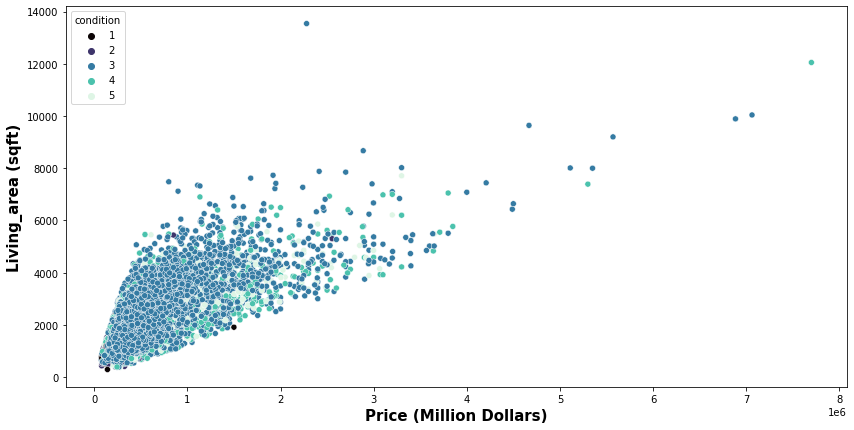

In [17]:
# price range based on conditions

plt.subplots(figsize=(14,7))

sns.scatterplot(data=df, x="price", y="sqft_living",hue="condition", palette="mako")

plt.xlabel('Price (Million Dollars)', size=15, weight='bold')
plt.ylabel('Living_area (sqft)', size=15, weight='bold')
plt.show()

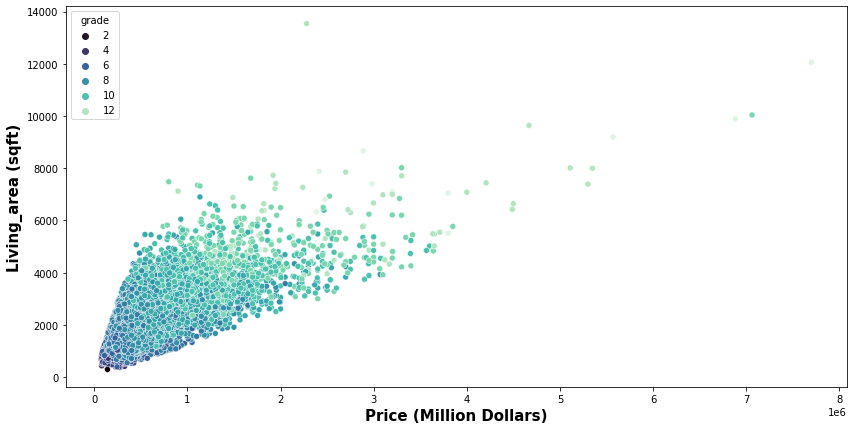

In [18]:
# price range based on building grades

plt.subplots(figsize=(14,7))

sns.scatterplot(data=df, x="price", y="sqft_living",hue="grade", palette="mako")

plt.xlabel('Price (Million Dollars)', size=15, weight='bold')
plt.ylabel('Living_area (sqft)', size=15, weight='bold')
plt.show()

Remark: 
- As we expected, house prices with condition of 3 and above is increasing with respect to living space
- Similarly, house prices for grade 6 and above is also getting expensive

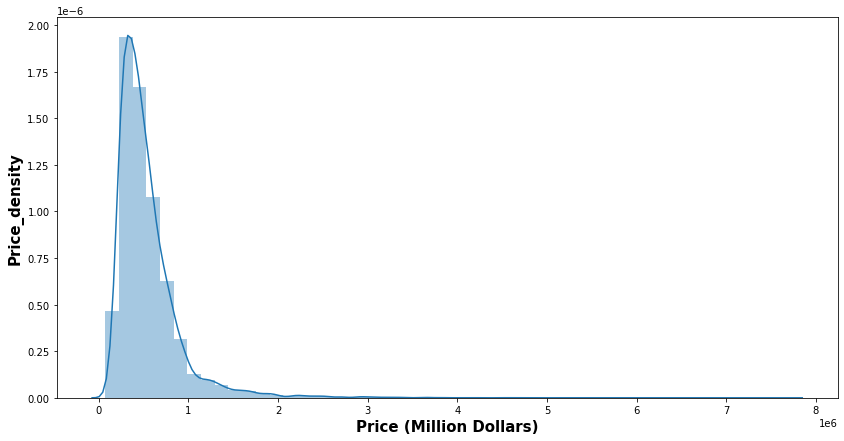

In [13]:
# House prices

plt.subplots(figsize=(14,7))

logged_price_dist = sns.distplot(df["price"])

plt.xlabel('Price (Million Dollars)', size=15, weight='bold')
plt.ylabel('Price_density', size=15, weight='bold')
plt.show()

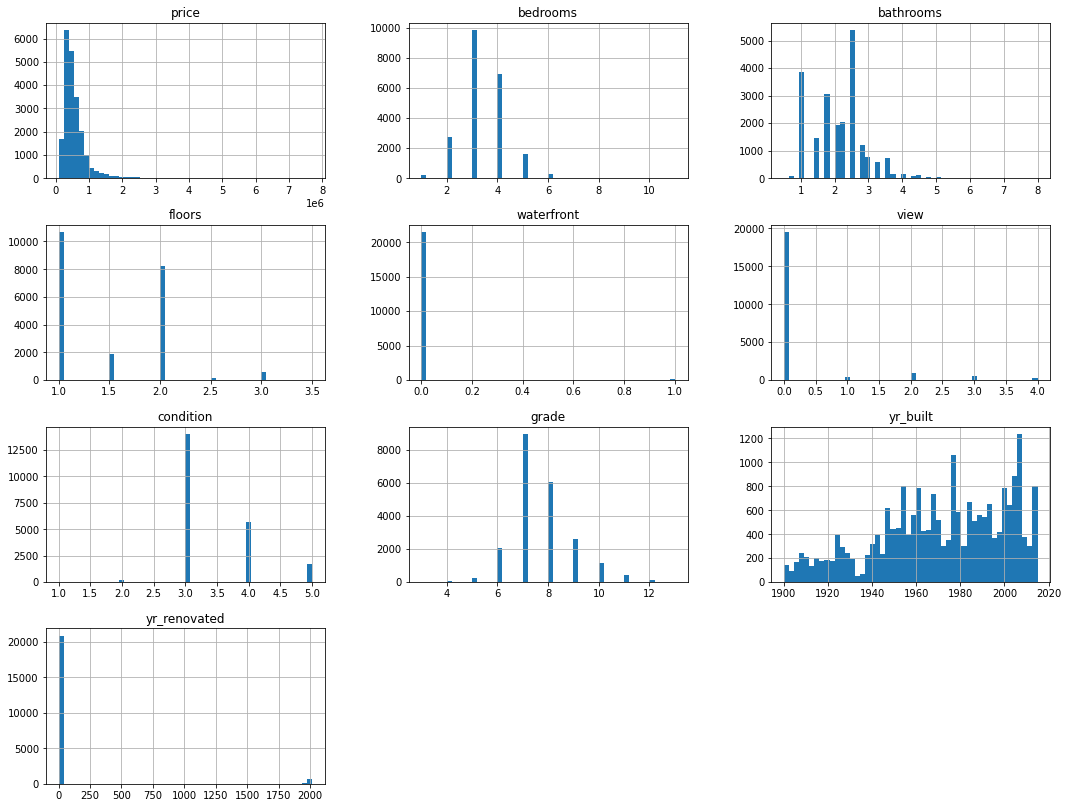

In [18]:
# hist plots for different features

hist_columns = ['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built','yr_renovated']
df[hist_columns].hist(bins=50, figsize = (18,14))
plt.show()

Remarks:
- Most of the houses prices ranges between $300K to $650K
<br>

- There is a high %age of houses with 3-4 bedrooms
- Around 10K houses have 1 floor and 8K houses has 2 floors

- According to King Count Buildings regulations
    - Condition 3 is considered as average condition, our dataset contains more than 12K houses with condition-3
    <br>
    
    - Grade 8 and above is considered above average

## Stakeholder (requirement-1)

> **Requirement-1 (City center)**

House | Criteria
--------|-------
Location | centrally located
Rooms | 3-4
Bathrooms | min. 2
Renovation | not more than 1 year
Condition | good -> 4 [source: https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#b]<br> - No obvious maintenance required<br> - But everything is not new 
Grade | custom design and higher quality finish work (11 and above) [source: https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#b]
Build year | Build after 2010
Availability | ASAP

In [20]:
# our stakeholder wants a house which is build after 2010

df_SH = df[df['yr_built']>2010]
df_SH

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
42,7203220400,2014-07-07,861990.0,5,2.75,3595,5639,2.0,0.0,0.0,...,9,3595,?,2014,0.0,98053,47.6848,-122.016,3625,5639
63,9528102996,2014-12-07,549000.0,3,1.75,1540,1044,3.0,0.0,0.0,...,8,1540,0.0,2014,0.0,98115,47.6765,-122.320,1580,3090
133,8929000270,2014-05-12,453246.0,3,2.50,2010,2287,2.0,0.0,0.0,...,8,1390,620.0,2014,0.0,98029,47.5517,-121.998,1690,1662
139,2767603505,2014-05-07,519950.0,3,2.25,1170,1249,3.0,0.0,0.0,...,8,1170,0.0,2014,0.0,98107,47.6722,-122.381,1350,1310
211,1025049114,2014-07-17,625504.0,3,2.25,1270,1566,2.0,0.0,0.0,...,8,1060,210.0,2014,0.0,98105,47.6647,-122.284,1160,1327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,8956200760,2014-10-13,541800.0,4,2.50,3118,7866,2.0,0.0,2.0,...,9,3118,0.0,2014,0.0,98001,47.2931,-122.264,2673,6500
21586,844000965,2014-06-26,224000.0,3,1.75,1500,11968,1.0,0.0,0.0,...,6,1500,0.0,2014,0.0,98010,47.3095,-122.002,1320,11303
21588,9834201367,2015-01-26,429000.0,3,2.00,1490,1126,3.0,0.0,0.0,...,8,1490,0.0,2014,0.0,98144,47.5699,-122.288,1400,1230
21589,3448900210,2014-10-14,610685.0,4,2.50,2520,6023,2.0,0.0,0.0,...,9,2520,0.0,2014,0.0,98056,47.5137,-122.167,2520,6023


In [21]:
# houses which are build after 2010 have average or better condition

df_SH.condition.unique()

array([3])

In [22]:
# Stakeholder is looking for houses having grade 11 and above

df_SH.grade.unique()

array([ 9,  8,  7, 10,  6, 11])

In [23]:
df_grade = df_SH[df_SH['grade']==11]
df_grade

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3449,2559950110,2015-04-22,1230000.0,2,2.50,2470,609,3.0,0.0,0.0,...,11,1910,560.0,2011,0.0,98112,47.6182,-122.312,2440,1229
5874,2525049148,2014-10-07,3420000.0,5,5.00,5450,20412,2.0,0.0,0.0,...,11,5450,?,2014,0.0,98039,47.6209,-122.237,3160,17825
7425,5316100780,2014-09-22,2580000.0,4,3.50,3280,3800,2.0,0.0,0.0,...,11,2880,400.0,2011,0.0,98112,47.6299,-122.280,2050,3800
19800,9477580030,2014-10-14,962000.0,4,2.75,3340,5700,2.0,0.0,0.0,...,11,3340,0.0,2013,0.0,98059,47.5059,-122.146,3340,6940
20071,9477580110,2014-06-26,971971.0,4,3.75,3460,6738,2.0,0.0,0.0,...,11,3460,0.0,2013,0.0,98059,47.5060,-122.145,3340,6120
20309,518500480,2014-08-11,3000000.0,3,3.50,4410,10756,2.0,1.0,4.0,...,11,3430,980.0,2014,0.0,98056,47.5283,-122.205,3550,5634
20310,1725059127,2015-02-25,2350000.0,6,4.25,5550,11547,2.0,0.0,2.0,...,11,4270,1280.0,2014,0.0,98033,47.6547,-122.202,3480,11547
20324,6389970010,2015-03-23,1360000.0,4,3.50,4120,12626,2.0,0.0,1.0,...,11,3970,150.0,2014,0.0,98034,47.7089,-122.245,4120,11913
21024,6447300365,2014-11-13,2900000.0,5,4.00,5190,14600,2.0,0.0,1.0,...,11,5190,0.0,2013,0.0,98039,47.6102,-122.225,3840,19250
21185,518500460,2014-10-08,2230000.0,3,3.50,3760,5634,2.0,1.0,4.0,...,11,2830,930.0,2014,0.0,98056,47.5285,-122.205,3560,5762


In [24]:
# Stakeholder is also looking for houses with 3-4 rooms

df_grade.bedrooms.unique()

array([2, 5, 4, 3, 6])

In [25]:
df_bedroom = df_grade[df_grade['bedrooms']<5]
df_bedroom

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3449,2559950110,2015-04-22,1230000.0,2,2.50,2470,609,3.0,0.0,0.0,...,11,1910,560.0,2011,0.0,98112,47.6182,-122.312,2440,1229
7425,5316100780,2014-09-22,2580000.0,4,3.50,3280,3800,2.0,0.0,0.0,...,11,2880,400.0,2011,0.0,98112,47.6299,-122.280,2050,3800
19800,9477580030,2014-10-14,962000.0,4,2.75,3340,5700,2.0,0.0,0.0,...,11,3340,0.0,2013,0.0,98059,47.5059,-122.146,3340,6940
20071,9477580110,2014-06-26,971971.0,4,3.75,3460,6738,2.0,0.0,0.0,...,11,3460,0.0,2013,0.0,98059,47.5060,-122.145,3340,6120
20309,518500480,2014-08-11,3000000.0,3,3.50,4410,10756,2.0,1.0,4.0,...,11,3430,980.0,2014,0.0,98056,47.5283,-122.205,3550,5634
20324,6389970010,2015-03-23,1360000.0,4,3.50,4120,12626,2.0,0.0,1.0,...,11,3970,150.0,2014,0.0,98034,47.7089,-122.245,4120,11913
21185,518500460,2014-10-08,2230000.0,3,3.50,3760,5634,2.0,1.0,4.0,...,11,2830,930.0,2014,0.0,98056,47.5285,-122.205,3560,5762
21294,2154970020,2014-07-03,2350000.0,4,4.25,5010,19412,2.0,0.0,1.0,...,11,4000,1010.0,2014,0.0,98040,47.5455,-122.211,3820,17064
21300,6600000050,2015-03-10,1700000.0,4,3.50,3950,6240,2.0,0.0,0.0,...,11,3950,0.0,2015,0.0,98112,47.6221,-122.290,2040,6240
21317,2424059174,2015-05-08,2000000.0,4,3.25,5640,35006,2.0,0.0,2.0,...,11,4900,740.0,2015,0.0,98006,47.5491,-122.104,4920,35033


In [26]:
# sorting houses based on built year

df_bedroom = df_bedroom.sort_values(by=['yr_built'], ascending=True)
df_bedroom

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3449,2559950110,2015-04-22,1230000.0,2,2.50,2470,609,3.0,0.0,0.0,...,11,1910,560.0,2011,0.0,98112,47.6182,-122.312,2440,1229
7425,5316100780,2014-09-22,2580000.0,4,3.50,3280,3800,2.0,0.0,0.0,...,11,2880,400.0,2011,0.0,98112,47.6299,-122.280,2050,3800
19800,9477580030,2014-10-14,962000.0,4,2.75,3340,5700,2.0,0.0,0.0,...,11,3340,0.0,2013,0.0,98059,47.5059,-122.146,3340,6940
20071,9477580110,2014-06-26,971971.0,4,3.75,3460,6738,2.0,0.0,0.0,...,11,3460,0.0,2013,0.0,98059,47.5060,-122.145,3340,6120
21514,8964800330,2015-04-07,3000000.0,4,3.75,5090,14823,1.0,0.0,0.0,...,11,4180,910.0,2013,0.0,98004,47.6200,-122.207,3030,12752
21516,324069112,2014-06-17,1330000.0,4,4.00,4420,16526,2.0,0.0,0.0,...,11,4420,0.0,2013,0.0,98075,47.5914,-122.027,3510,50447
20309,518500480,2014-08-11,3000000.0,3,3.50,4410,10756,2.0,1.0,4.0,...,11,3430,980.0,2014,0.0,98056,47.5283,-122.205,3550,5634
20324,6389970010,2015-03-23,1360000.0,4,3.50,4120,12626,2.0,0.0,1.0,...,11,3970,150.0,2014,0.0,98034,47.7089,-122.245,4120,11913
21185,518500460,2014-10-08,2230000.0,3,3.50,3760,5634,2.0,1.0,4.0,...,11,2830,930.0,2014,0.0,98056,47.5285,-122.205,3560,5762
21294,2154970020,2014-07-03,2350000.0,4,4.25,5010,19412,2.0,0.0,1.0,...,11,4000,1010.0,2014,0.0,98040,47.5455,-122.211,3820,17064


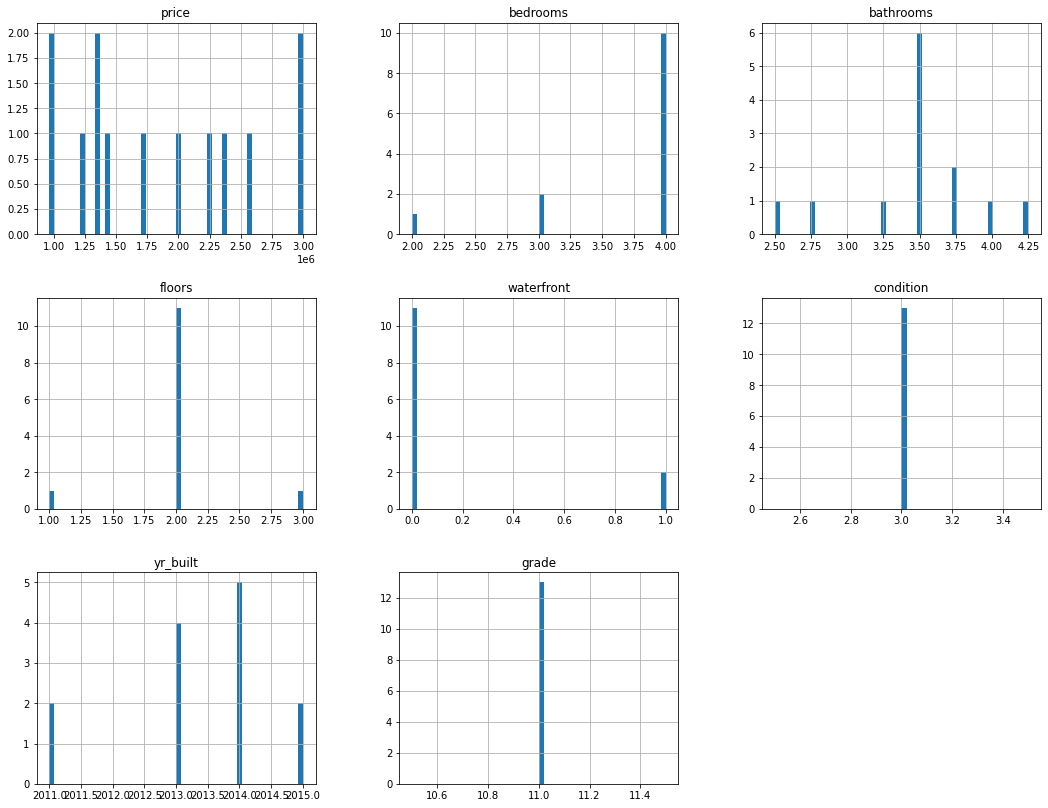

In [27]:
hist_columns_1 = ['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'yr_built', 'grade']
df_bedroom[hist_columns_1].hist(bins=50, figsize = (18,14))
plt.xticks(rotation='vertical')
plt.show();

Remarks after fulfilling Stakeholder requirements:
<br>

- There are 13 houses available for Stakeholder with price ranging from $0.1M to $3M
<br>

- 10 houses have 4 rooms and 2 houses have 3 rooms
- Stakeholder also has the possibility to select a house also with waterfront 

### Geo Map location

In [28]:
s = folium.Figure(width=800, height=500)

map1= folium.Map(location=[df_bedroom.lat.mean(), df_bedroom.long.mean()], zoom_start=11, control_scale=True).add_to(s)

for index, location_info in df_bedroom.iterrows():
    folium.Marker([location_info["lat"], location_info["long"]], popup=location_info["price"]).add_to(map1)

In [ ]:
map1

In [29]:
map1.save('city_map.html')

Remarks: 
In the city center house prices are higher, but our Stakeholder has budget to buy one the housed located in the city center. We will also recommend our Stakeholder about the possibility of acquiring house in the South direction from city center. The advantage for South direction houses is that in the evening they will have some quite time. Commuting towards the city center also doesn't take that longer.

## Stakeholder (requirement-2)

> **Requirement-2 (Countryside)**

House | Criteria
--------|-------
Location | out skirts
Rooms | 4
Bathrooms | min. 3
Renovation | no
Condition | average -> 3 [source: https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#b]<br> - Maintenance required<br> - Renovation required<br> 
Grade | Better architecture design -> 9 [source: https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#b]
Build year | Build in year 2010
Availability | can wait for good option

In [30]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [45]:
df_yr_build = df[(df['yr_built']==2010)]
df_yr_build

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
116,3362400431,2014-06-26,518500.0,3,3.5,1590,1102,3.0,0.0,0.0,...,8,1590,0.0,2010,0.0,98103,47.6824,-122.347,1620,3166
206,9526600140,2014-09-19,677900.0,3,2.5,2440,4587,2.0,0.0,0.0,...,8,2440,0.0,2010,0.0,98052,47.7073,-122.114,2750,4587
341,1115300070,2014-11-06,684000.0,4,3.5,3040,8414,2.0,0.0,0.0,...,9,2420,620.0,2010,0.0,98059,47.5222,-122.157,3470,8066
753,8682300890,2014-08-28,699800.0,2,2.5,2380,6600,1.0,0.0,0.0,...,8,2380,0.0,2010,0.0,98053,47.7170,-122.020,1870,6600
863,1937300270,2015-03-03,910000.0,3,3.5,2480,3200,2.0,0.0,0.0,...,10,2480,0.0,2010,0.0,98144,47.5951,-122.307,1980,3200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21490,2524069097,2014-05-09,2240000.0,5,6.5,7270,130017,2.0,0.0,0.0,...,12,6420,850.0,2010,0.0,98027,47.5371,-121.982,1800,44890
21519,2909310100,2014-10-15,332000.0,4,2.5,2380,5737,2.0,0.0,0.0,...,7,2380,?,2010,0.0,98023,47.2815,-122.356,2380,5396
21538,2855000110,2014-08-08,388000.0,3,2.5,2198,6222,2.0,0.0,2.0,...,8,2198,0.0,2010,0.0,98198,47.3906,-122.304,2198,7621
21541,2770603523,2015-04-22,530000.0,3,2.5,1410,1250,2.0,0.0,0.0,...,8,1140,270.0,2010,0.0,98119,47.6515,-122.375,1720,2825


In [46]:
print(df_yr_build.condition.unique())
print(df_yr_build.grade.unique())

[3]
[ 8  9 10  7 11 12]


In [47]:
df_grade_1= df_yr_build.query('grade ==9')
df_grade_1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
341,1115300070,2014-11-06,684000.0,4,3.50,3040,8414,2.0,0.0,0.0,...,9,2420,620.0,2010,0.0,98059,47.5222,-122.157,3470,8066
1875,1853081000,2014-07-17,820000.0,5,2.75,2830,6137,2.0,0.0,0.0,...,9,2830,0.0,2010,0.0,98074,47.5932,-122.058,3170,6285
5670,7933250050,2014-10-28,1420000.0,5,3.25,4020,4500,2.0,0.0,0.0,...,9,3120,900.0,2010,0.0,98004,47.6349,-122.204,3550,5775
9419,1853081250,2014-12-29,800000.0,4,2.75,3120,5000,2.0,0.0,0.0,...,9,3120,0.0,2010,0.0,98074,47.5940,-122.062,3200,5000
9489,7203100730,2015-02-10,875000.0,4,3.50,3790,6874,2.5,0.0,0.0,...,9,3790,0.0,2010,0.0,98053,47.6956,-122.022,3370,6535
10051,3303860160,2015-02-24,430000.0,3,2.50,2670,12806,2.0,0.0,0.0,...,9,2670,0.0,2010,0.0,98038,47.3686,-122.059,3010,7231
12522,6003001999,2015-02-09,530000.0,2,1.75,1170,976,2.0,0.0,0.0,...,9,780,390.0,2010,0.0,98102,47.6192,-122.316,1280,1183
12597,269000970,2015-04-02,1300000.0,5,3.75,4450,7680,2.0,0.0,0.0,...,9,3460,990.0,2010,0.0,98199,47.6418,-122.392,2550,6400
12892,5100403882,2015-04-27,967000.0,4,2.50,3100,7250,2.0,0.0,0.0,...,9,3100,0.0,2010,0.0,98115,47.6961,-122.316,1240,6670
19476,7203100850,2015-04-27,840000.0,4,3.25,3500,5960,2.0,0.0,0.0,...,9,3500,0.0,2010,0.0,98053,47.6944,-122.022,3390,6856


In [49]:
df_grade_1.bedrooms.unique()

array([4, 5, 3, 2])

In [54]:
df_bedroom_1 = df_grade_1[df_grade_1['bedrooms']>3]
df_bedroom_1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
341,1115300070,2014-11-06,684000.0,4,3.50,3040,8414,2.0,0.0,0.0,...,9,2420,620.0,2010,0.0,98059,47.5222,-122.157,3470,8066
1875,1853081000,2014-07-17,820000.0,5,2.75,2830,6137,2.0,0.0,0.0,...,9,2830,0.0,2010,0.0,98074,47.5932,-122.058,3170,6285
5670,7933250050,2014-10-28,1420000.0,5,3.25,4020,4500,2.0,0.0,0.0,...,9,3120,900.0,2010,0.0,98004,47.6349,-122.204,3550,5775
9419,1853081250,2014-12-29,800000.0,4,2.75,3120,5000,2.0,0.0,0.0,...,9,3120,0.0,2010,0.0,98074,47.5940,-122.062,3200,5000
9489,7203100730,2015-02-10,875000.0,4,3.50,3790,6874,2.5,0.0,0.0,...,9,3790,0.0,2010,0.0,98053,47.6956,-122.022,3370,6535
12597,269000970,2015-04-02,1300000.0,5,3.75,4450,7680,2.0,0.0,0.0,...,9,3460,990.0,2010,0.0,98199,47.6418,-122.392,2550,6400
12892,5100403882,2015-04-27,967000.0,4,2.50,3100,7250,2.0,0.0,0.0,...,9,3100,0.0,2010,0.0,98115,47.6961,-122.316,1240,6670
19476,7203100850,2015-04-27,840000.0,4,3.25,3500,5960,2.0,0.0,0.0,...,9,3500,0.0,2010,0.0,98053,47.6944,-122.022,3390,6856
19841,662440030,2015-03-26,435000.0,4,2.50,3100,4699,2.0,0.0,0.0,...,9,3100,0.0,2010,0.0,98038,47.3785,-122.023,2450,5130
20189,7203120050,2014-10-08,789500.0,4,3.25,3240,4852,2.0,0.0,0.0,...,9,3240,0.0,2010,0.0,98053,47.6950,-122.022,3320,5318


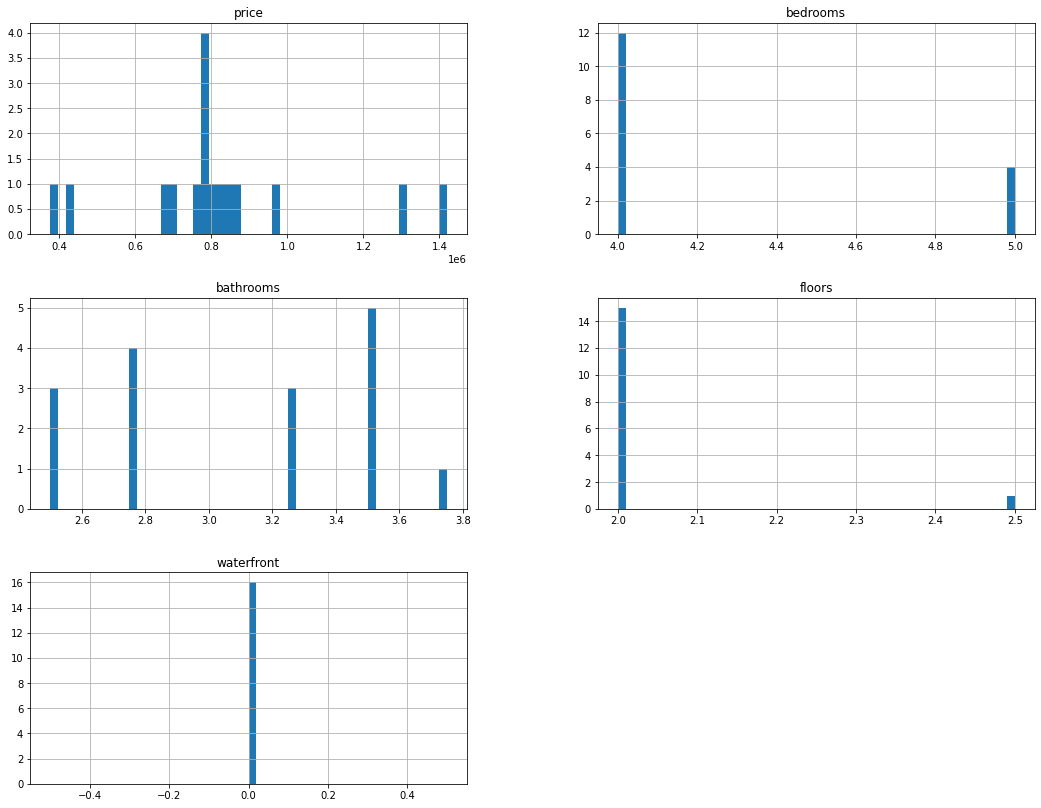

In [58]:
hist_columns_2 = ['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront']
df_bedroom_1[hist_columns_2].hist(bins=50, figsize = (18,14))
plt.xticks(rotation='vertical')
plt.show();

Remarks:
In the suburban area houses prices ranges between $0.7M to $0.9M

### Geo Map location

In [56]:
f = folium.Figure(width=800, height=500)

map3= folium.Map(location=[df_bedroom_1.lat.mean(), df_bedroom_1.long.mean()], zoom_start=11, control_scale=True).add_to(f)

for index, location_info in df_bedroom_1.iterrows():
    folium.Marker([location_info["lat"], location_info["long"]], popup=location_info["price"]).add_to(map3)

In [57]:
map3

In [ ]:
map3.save('urban_map.html')

Remarks: 
For the 2nd house we have 2 possibilities
- In the North of the city center, Stakeholder will have the possibility to do water sports and sailing on the weekends.
- In the East direction our Stakeholder will have the possibility to do hiking and horse riding. The houses are also not that far away from the city as well.